# <font color='Blue'>Random Forest .</font>

Random Forest is a machine learning model that uses multiple decision trees to make predictions. Instead of relying on one tree, it builds many trees from random samples of the data and features. Each tree makes its own prediction, and the final result is determined by combining these predictions—either by voting for classification or averaging for regression. This approach improves accuracy and reduces the risk of overfitting, making Random Forest a robust and reliable model for various tasks. Additionally, it can highlight which features are most important for predictions.

**Type**: Ensemble learning method.


**Purpose**: Used for classification and regression tasks.


**Base Model**: Composed of multiple decision trees.

# <font color='Blue'> </font>

# <font color='Blue'> </font>

### <font color='red'>Steps to Construct Random Forest Tree  .</font>

**Create Multiple Bootstrap Samples**:

For each tree in the Random Forest, a new bootstrap sample is created from the original dataset. If you specify, say, 100 trees, the process will repeat 100 times.


Each bootstrap sample will have the same number of rows as the original dataset but may contain duplicate rows and may omit some rows.


**Build a Decision Tree for Each Bootstrap Sample**:

For each bootstrap sample, a decision tree is constructed. The steps for building each tree include:


Calculating impurity (like Gini impurity or MSE).


Evaluating possible splits based on a random subset of features.


Selecting the best splits recursively until a stopping criterion is met (like max depth, minimum samples per leaf, or pure nodes).

**Repeat for Each Boostrap Tree**:

This process continues for all specified trees (e.g., 100 trees), resulting in 100 individual decision trees.

**Final Prediction**:

**For Classification**: The final prediction is made by taking a majority vote across all trees. The class that appears most frequently among the predictions of the individual trees is selected.


**For Regression**: The final prediction is obtained by averaging the outputs of all the trees.

# <font color='Blue'> </font>

# <font color='Blue'> </font>

### <font color='red'>Mathematical Formulas to create Random Forest Tree.</font>

- I will kepp only formulas because calculation part as same what we have did in Decision Tree

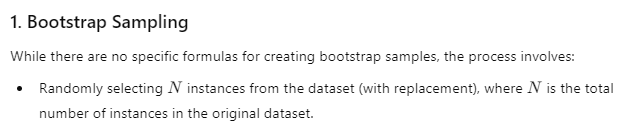

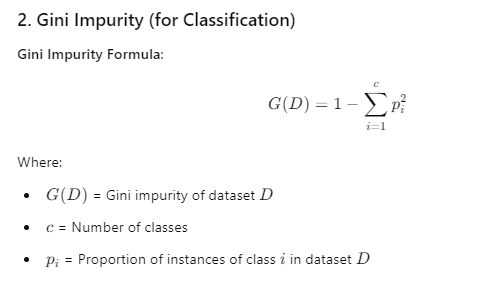

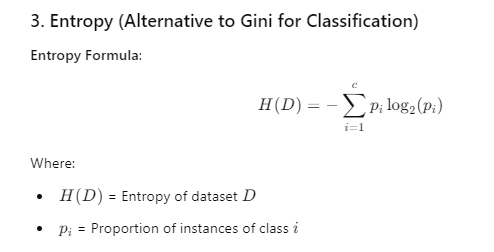

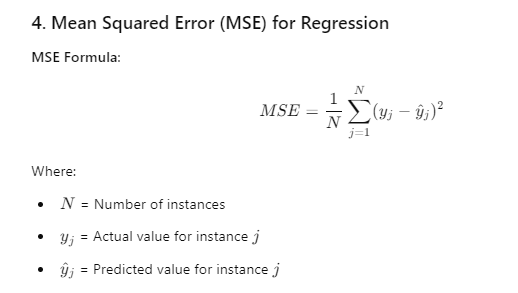

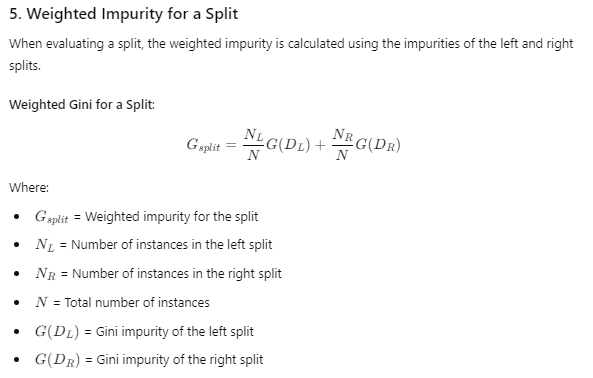

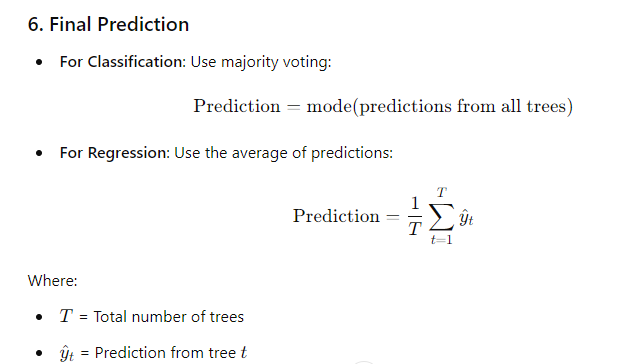

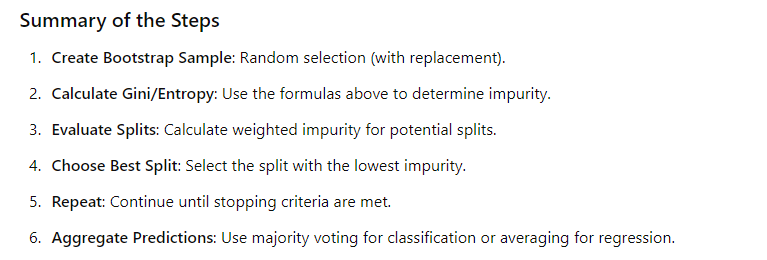

- This are the steps and formulas to create Random Forest Tree manually and mathematically 

# <font color='Blue'> </font>

# <font color='Blue'> </font>

# <font color='Blue'> </font>

## <font color='red'>Model Building Random Forest for Regression Problem.</font>

Using RF regression model predicting the salaries for the positions.

#### <font color='magenta'>Importing Libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

#### <font color='magenta'> Loading Data </font>

In [3]:
df = pd.read_csv("D:/Sai/Data sets/RF/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


- For better understanding purpose i have taken a small data set

#### <font color='magenta'>EDA </font>

In [4]:
# view dimensions of dataset

df.shape

(10, 3)

In [5]:
# preview the dataset

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
col_names = df.columns
col_names

Index(['Position', 'Level', 'Salary'], dtype='object')

In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
# check missing values

df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [10]:
# Check data types

df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object


#### <font color='magenta'>Model building </font>

In [13]:
# Creating X & Y datasets for Model building

X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2].values

print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [14]:
# Fitting the Regression model to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,Y)

RandomForestRegressor(n_estimators=300, random_state=0)

#### <font color='magenta'> Predicting</font>

In [24]:
Y_Pred = regressor.predict(np.array([[6.5]]))
Y_Pred

array([160333.33333333])

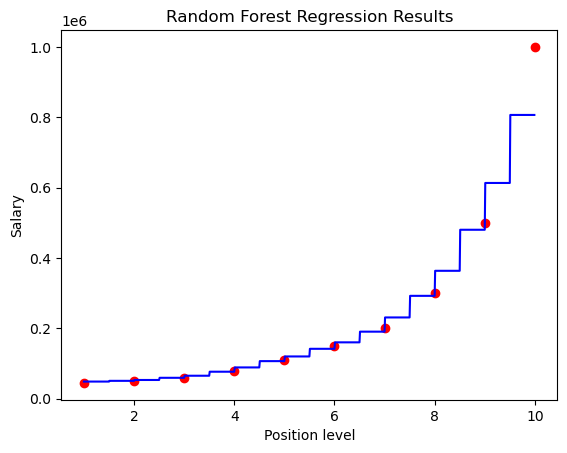

In [25]:
# Visualising the Random Forest Regression results in higher resolution and smoother curve
X_Grid = np.arange(min(X), max(X), 0.01)
X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(X_Grid, regressor.predict(X_Grid), color = 'blue')
plt.title('Random Forest Regression Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

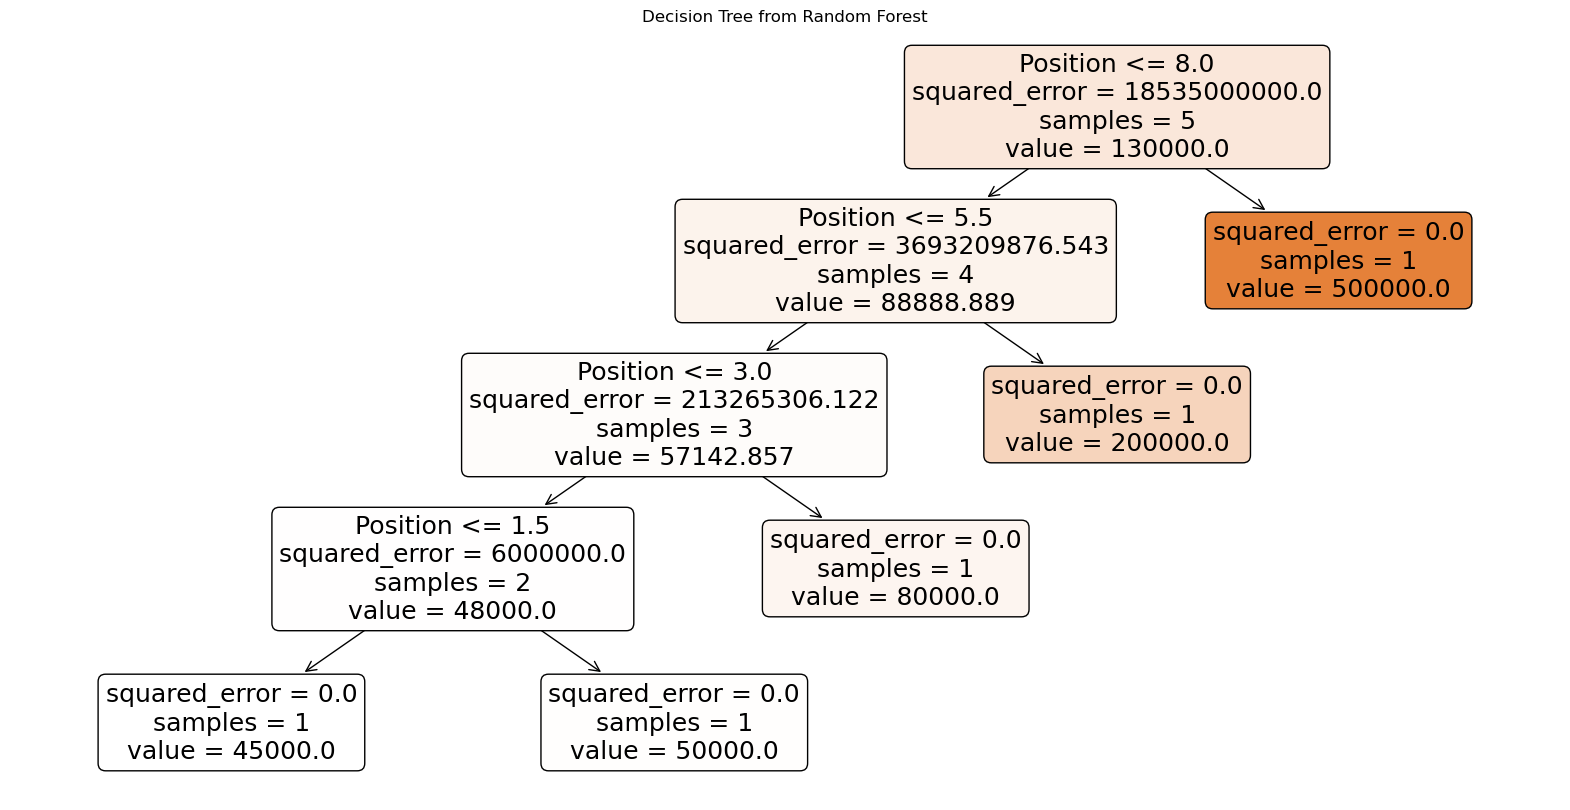

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'regressor' is your RandomForestRegressor
# Extract the first tree from the Random Forest
tree = regressor.estimators_[299]

# Plot the extracted decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=df.columns, filled=True, rounded=True)
plt.title('Decision Tree from Random Forest')
plt.show()

# <font color='red'>END </font>